In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('VIX_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data_clean = data
data_clean.fillna(data_clean.mean(), inplace=True)

In [40]:
all_feature_names = list(data_clean.columns)
all_feature_names

['Date',
 'Unemployment Rate',
 'CPI',
 'Three Month T Bill Rate',
 'Six Month T Bill Rate',
 '10-Year Treasury Constant Maturity Rate',
 'Fed Rate',
 'BBB Rate',
 'SP500 Index',
 'VIX',
 'GDP',
 'Initial Claims',
 'JPY/USD Spot Rate',
 'Total Nonfarm Employees',
 'Spot Crude Oil Price',
 'SP500 Volume',
 'NASDAQ Open',
 'NASDAQ High',
 'NASDAQ Low',
 'NASDAQ Close',
 'NASDAQ Adj Close',
 'NASDAQ Volume',
 'DJI Open',
 'DJI High',
 'DJI Low',
 'DJI Close',
 'DJI Adj Close',
 'DJI Volume',
 'RUSSELL2000 Open',
 'RUSSELL2000 High',
 'RUSSELL2000 Low',
 'RUSSELL2000 Close',
 'RUSSELL2000 Adj Close',
 'RUSSELL2000 Volume',
 'FTSE Open',
 'FTSE High',
 'FTSE Low',
 'FTSE Close',
 'FTSE Adj Close',
 'FTSE Volume',
 'NIKKEI Open',
 'NIKKEI High',
 'NIKKEI Low',
 'NIKKEI Close',
 'NIKKEI Adj Close',
 'NIKKEI Volume',
 'GOLD Open',
 'GOLD High',
 'GOLD Low',
 'GOLD Close',
 'GOLD Adj Close',
 'GOLD Volume',
 'USD INDEX Open',
 'USD INDEX High',
 'USD INDEX Low',
 'USD INDEX Close',
 'USD INDEX 

In [41]:
selected_features = [
    'Unemployment Rate',
    'CPI',
    'Three Month T Bill Rate',
    'Six Month T Bill Rate',
    '10-Year Treasury Constant Maturity Rate',
    'Fed Rate',
    'BBB Rate',
    'SP500 Index',
    'GDP',
    'Initial Claims',
    'JPY/USD Spot Rate',
]

In [42]:
X = data_clean[selected_features]
y = data_clean['VIX']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [44]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2.7477048809263898

In [45]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [46]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

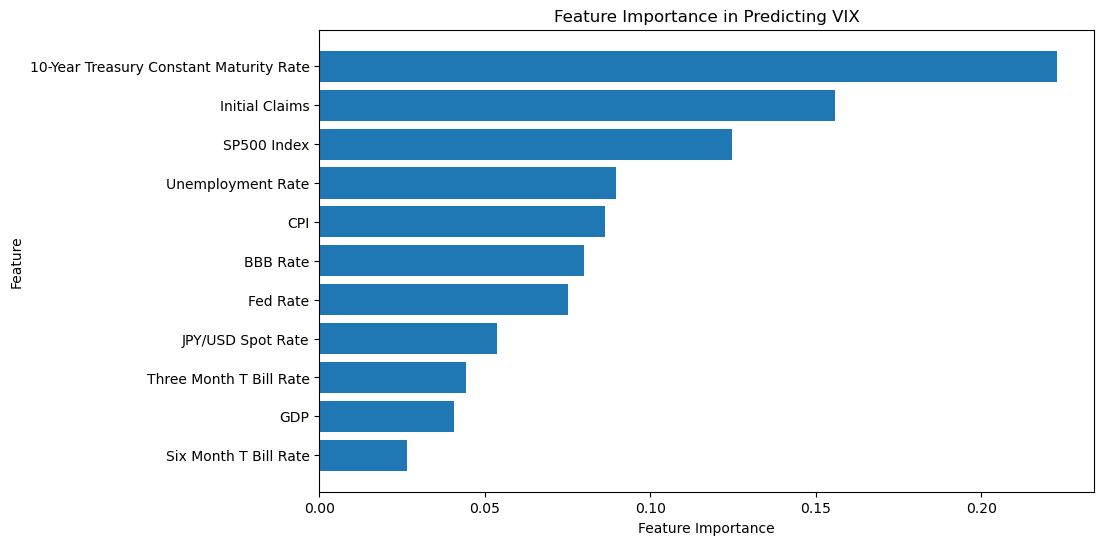

In [47]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting VIX')
plt.gca().invert_yaxis()
plt.show()

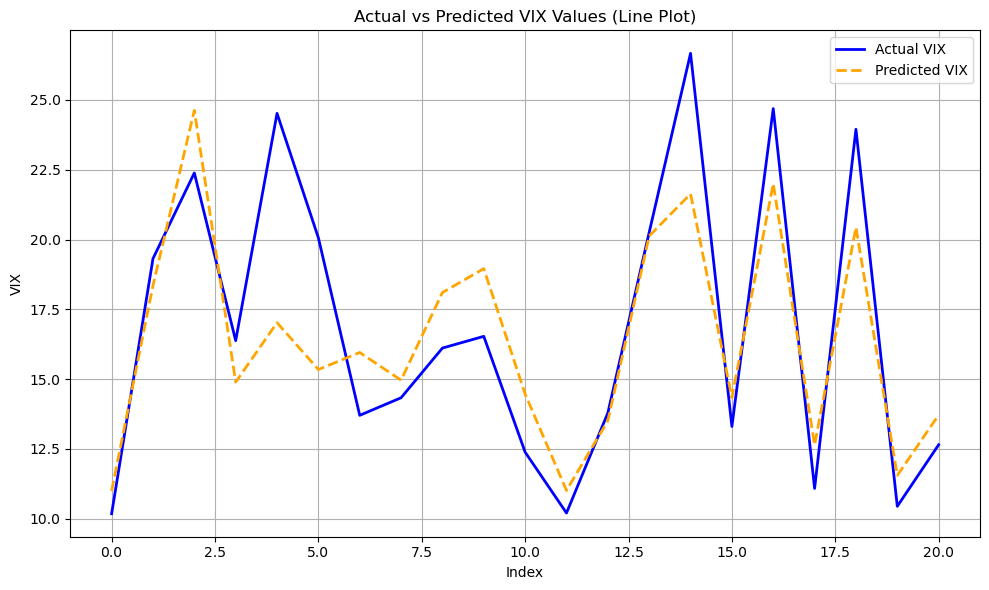

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual VIX', color='blue', linewidth=2)
plt.plot(range(len(y_test)), y_pred, label='Predicted VIX', color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('Index')
plt.ylabel('VIX')
plt.title('Actual vs Predicted VIX Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()